<a href="https://colab.research.google.com/github/Kapetis/Video-Analytics/blob/main/DDP_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pre-requisites**

Clone the github repository in '/root' folder, which is also our working directory

In [6]:
%cd
!git clone https://github.com/Kapetis/Person-Tracking-and-Re-ID.git

/root


Download weights, if not available locally

In [8]:
!gdown https://drive.google.com/uc?id=1w2-mhmllgaob6KESagEyL1IMRlPRRjBg \
-O /root/Person-Tracking-and-Re-ID/people-counting/yolo/yolov3.weights

Downloading...
From: https://drive.google.com/uc?id=1w2-mhmllgaob6KESagEyL1IMRlPRRjBg
To: /root/Person-Tracking-and-Re-ID/people-counting/yolo/yolov3.weights
248MB [00:03, 64.0MB/s]


In [9]:
!gdown https://drive.google.com/uc?id=1eoKmP4cdOAu1xmQMsmKYulSIKVXZFP9n \
-O /root/Person-Tracking-and-Re-ID/deep-reid/log/resnet50/model.pth.tar-60

Downloading...
From: https://drive.google.com/uc?id=1eoKmP4cdOAu1xmQMsmKYulSIKVXZFP9n
To: /root/Person-Tracking-and-Re-ID/deep-reid/log/resnet50/model.pth.tar-60
301MB [00:01, 185MB/s]


# **Tracking and generating metadata**

Move to tracking/counting directory

In [12]:
%cd /root/Person-Tracking-and-Re-ID/people-counting/

/root/Person-Tracking-and-Re-ID/people-counting


Running tracker script on 'sample1.mp4'

In [13]:
!python3 darknet_people_counter.py -o out.mp4 -i videos/sample1.mp4

sample1
[INFO] loading model...
layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512 

Code to move metadata into 'deep-reid' folder for future use (Transferring metadata)

In [14]:
import os
import math
import shutil

dataset_dir = '../deep-reid/reid-data/Test_folder'

# remove and create dataset directory
shutil.rmtree(dataset_dir, ignore_errors=True)
os.mkdir(dataset_dir)
os.mkdir(dataset_dir + '/gallery')
os.mkdir(dataset_dir + '/query')

Transfer 'sample1.mp4' images

In [15]:
for f in (os.listdir('gallery')):
    if f.endswith(".jpg"):
        shutil.copy('gallery/' + f, dataset_dir + '/gallery')

Running tracker script on 'sample1-flip.mp4'

In [16]:
!python3 darknet_people_counter.py -o out-flip.mp4 -i videos/sample1-flip.mp4

sample1-flip
[INFO] loading model...
layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x

Transfer 'sample1-flip.mp4' images

In [17]:
for f in (os.listdir('gallery')):
    if f.endswith(".jpg"):
        shutil.copy('gallery/' + f, dataset_dir + '/gallery')

# **Person Re-ID**

Change working directory to 'deep-reid'

In [18]:
%cd ../deep-reid/

/root/Person-Tracking-and-Re-ID/deep-reid


Randomly make small query set from available images

sample1_9_0.jpg


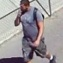

sample1_8_0.jpg


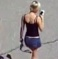

sample1_12_0.jpg


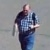

sample1-flip_7_0.jpg


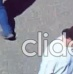

sample1-flip_0_0.jpg


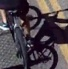

In [19]:
import random
import os
import shutil
from IPython.display import Image, display

gdir = 'reid-data/Test_folder/gallery/'
qdir = 'reid-data/Test_folder/query/'

queries = random.sample(os.listdir(gdir), k = 5)

for query in queries:
    shutil.copy(gdir + query, qdir)
    print(query)
    display(Image(gdir + query))

In [20]:
import numpy
numpy.version.version

'1.18.5'

Run re-id script to find top 5 matching images to each query

In [21]:
!python3 finder.py

/root/Person-Tracking-and-Re-ID/deep-reid/torchreid/metrics/rank.py:12: UserWarning: Cython evaluation (very fast so highly recommended) is unavailable, now use python evaluation.
  'Cython evaluation (very fast so highly recommended) is '
Building train transforms ...
+ resize to 256x128
+ random flip
+ random crop (enlarge to 288x144 and crop 256x128)
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
Building test transforms ...
+ resize to 256x128
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
=> Loading train (source) dataset
=> Loaded NewDataset
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |     1 |        1 |         1
  query    |     5 |        5 |         2
  gallery  |    14 |       25 |         2
  ----------------------------------------
=> Loading test (target) datase

# New Section

# New Section

Visualize output (Output directory - reid-data/visrank_Test_dataset/)

In [2]:
! nvidia-smi


Sun Dec  6 22:54:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

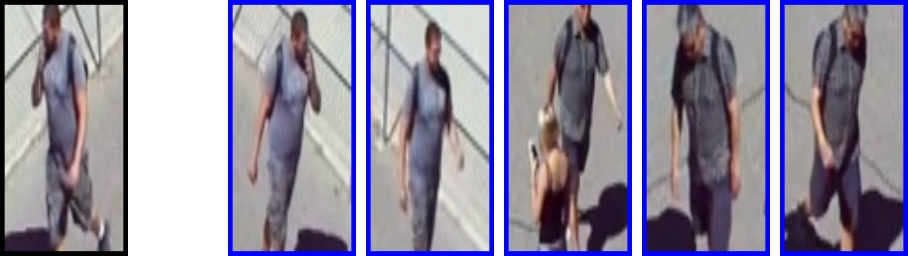

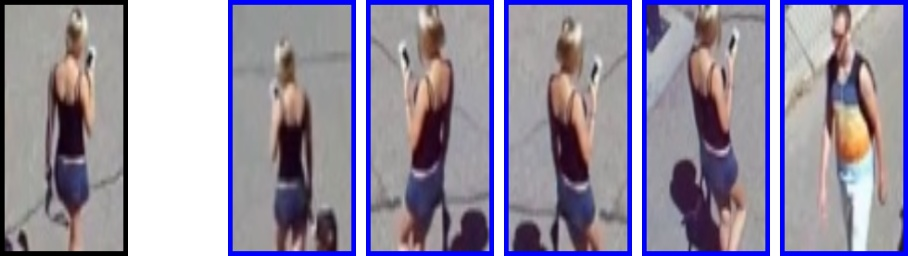

In [22]:
from IPython.display import Image, display
vis_dir = 'reid-data/visrank_Test_dataset/'
display(Image(vis_dir + queries[0]))
display(Image(vis_dir + queries[1]))
#display(Image(vis_dir + queries[2]))

# **Contact Tracing**

In [ ]:
!python darknet_people_counter_contact.py -o out-contact.mp4 -i videos/sample1.mp4

[INFO] loading model...
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    

In [ ]:
!cp out-contact.mp4 /content/drive/My\ Drive/DDP-demo/out-contact.mp4

cp: cannot create regular file '/content/drive/My Drive/DDP-demo/out-contact.mp4': No such file or directory


Extras

In [ ]:
%ls -a /root/people-counting/gallery/

ls: cannot access '/root/people-counting/gallery/': No such file or directory


In [ ]:
!rm -rf reid-data/Test_folder/query/.ipynb_checkpoints/

In [ ]:
%ls -a reid-data/Test_folder/gallery/

ls: cannot access 'reid-data/Test_folder/gallery/': No such file or directory


In [ ]:
!unzip "/content/drive/My Drive/DDP-demo/darknet_old.zip"
!unzip "/content/drive/My Drive/DDP-demo/people-counting_new.zip"
!unzip "/content/drive/My Drive/DDP-demo/deep-reid_new.zip"

unzip:  cannot find or open /content/drive/My Drive/DDP-demo/darknet_old.zip, /content/drive/My Drive/DDP-demo/darknet_old.zip.zip or /content/drive/My Drive/DDP-demo/darknet_old.zip.ZIP.
unzip:  cannot find or open /content/drive/My Drive/DDP-demo/people-counting_new.zip, /content/drive/My Drive/DDP-demo/people-counting_new.zip.zip or /content/drive/My Drive/DDP-demo/people-counting_new.zip.ZIP.
unzip:  cannot find or open /content/drive/My Drive/DDP-demo/deep-reid_new.zip, /content/drive/My Drive/DDP-demo/deep-reid_new.zip.zip or /content/drive/My Drive/DDP-demo/deep-reid_new.zip.ZIP.


In [ ]:
!zip -r reid-data.zip reid-data/

	zip warning: name not matched: reid-data/

zip error: Nothing to do! (try: zip -r reid-data.zip . -i reid-data/)
